# ECON_611 Final Project

#### Group Name: SyntaxError_Omega

| Members |       Email_Address       |
|:-------:|:-------------------------:|
| Paola   | pmares@dons.usfca.edu     |
| Aboli   | agkhairnar@dons.usfca.edu |
| Junjie  | Jlei6@usfca.edu           |

---

In our code, we need the following packages installed;

- plotly
- Collection.Counter
- Bokeh (optional)
- statsmodels

Also, I used a lot of `polts` and `data vis`, it is best clone and run it to see the plots

It is suggested to combine the `UML` attached in the github repo to undestand the variable names and our thought process.

In [279]:
# pip install plotly

In [280]:
# pip install bokeh

In [281]:
# pip install statsmodels 

In [282]:
# import necessary packages
'''
    LOADING IMPORT PACAKGES
    need to set plotly as the offline mode
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')

import plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

from scipy import stats
import statsmodels.api as sm
import datetime as dt

from collections import Counter

In [283]:
py.init_notebook_mode(connected=True)

In [284]:
# try some extensive plot 
'''
    load BOKEH package just for testing
'''

import bokeh
import numpy as np
from bokeh.models import Circle, ColumnDataSource, Line, LinearAxis, Range1d
from bokeh.plotting import figure, output_notebook, show
from bokeh.core.properties import value

bokeh.io.reset_output()
bokeh.io.output_notebook()


Loading BokehJS ...

## 1. load data from file

In [285]:
file_path = '../fianlProject/database/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
data = pd.read_csv(file_path)
base_data = data

## 2. Initial overview of the data

In [286]:
data.describe().T

count          mean           std         min  \
Store Number           270955.0  3.590264e+03    947.662050     2106.00   
County Number          269878.0  5.723164e+01     27.341205        1.00   
Category               270887.0  1.043888e+06  50182.111075  1011100.00   
Vendor Number          270955.0  2.564344e+02    141.014890       10.00   
Item Number            270955.0  4.597496e+04  52757.043086      168.00   
Bottle Volume (ml)     270955.0  9.248303e+02    493.088489       50.00   
Bottles Sold           270955.0  9.871285e+00     24.040912        1.00   
Volume Sold (Liters)   270955.0  8.981351e+00     28.913690        0.10   
Volume Sold (Gallons)  270955.0  2.372830e+00      7.638182        0.03   

                             25%         50%         75%         max  
Store Number              2604.0     3722.00     4378.00     9023.00  
County Number               31.0       62.00       77.00       99.00  
Category               1012200.0  1031200.00  1062310.00  1701100.00  
Vendor Number              115.0      260.00      380.00      978.00  
Item Number              26827.0    38176.00    64573.00   995507.00  
Bottle Volume (ml)         750.0      750.00     1000.00     6000.00  
Bottles Sold                 2.0        6.00       12.00     2508.00  
Volume Sold (Liters)         1.5        5.25       10.50     2508.00  
Volume Sold (Gallons)        0.4        1.39        2.77      662.54

In [287]:
# see some differnt datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

## 3. clean the datasets
#### 3.1 identify the cols need to be cleaned 
#### where and how is the data corrputed

pandas dtype $\rightarrow$ str；string_, unicode_, text usage
hence dtype does not match with the intuition; 


| Col Name            | inutition | acutal dtype | if_match  |
|---------------------|-----------|--------------|-----------|
| Date                | int       | obj          | **false** |
| Store Number        | int       | int64        | true      |
| city                | str       | obj          | true      |
| zip code            | int       | obj          | false     |
| County Number       | int       | float64      | false     |
| County              | str       | obj          | true      |
| category name       | obj       | obj          | True      |
| Vendor Number       | int       | int64        | true      |
| Item Number         | int       | int64        | true      |
| Item Desc           | str       | obj          | true      |
| bottle vol (ml)     | int       | int64        | true      |
| State bottle cost   | float     | obj          | false     |
| State bottle retail | float     | obj          | false     |
| Bottle sold         | int       | int64        | true      |
| sale                | float     | obj          | false     |
| vol sold (liters)   | float     | float64      | true      |
| vol sold (gallon)   | float     | float64      | true      |

## 3.2 Clean the columns

#### remove NAs

In [288]:
# replace all the blank with NAs
data = data.replace('', np.nan, regex=True)

In [289]:
# count how many NAs in the df each col
print(data.isna().sum())

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64


In [290]:
# remove all the NAs
data = data.dropna()
print(data.isna().sum())

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64


#### Date --> Pandas.Date

In [291]:
# transfer the col `Date` to `_datetime`
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data[['Date']].head(5)

Date
0 2015-11-04
1 2016-03-02
2 2016-02-11
3 2016-02-03
4 2015-08-18

In [292]:
# zip code --> transfer it from object to int
# this chunk of code can only be run once!!!
data['Zip Code'] = data['Zip Code'].str.replace('-', '')
data["Zip Code"] = pd.to_numeric(data["Zip Code"])
#                                  errors  = 'ignore')
# Note: line 116 there is a special chr 712-2
data[['Zip Code' ]].loc[110:116]

Zip Code
110     52732
111     50665
112     52601
113     52240
114      7122
115     51041
116     51455

#### iteratively transfer cols dtype

In [293]:
# using dictionary to convert specific cols
data['State Bottle Cost'] = data['State Bottle Cost'].str.replace('$', '')
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '')
data['Sale (Dollars)'] = data['Sale (Dollars)'].str.replace('$', '')
convert_dict = {
    'County Number': int,
    'Category': int,
    'State Bottle Cost': float,
    'State Bottle Retail': float,
    'Sale (Dollars)': float    
}

data = data.astype(convert_dict)

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null datetime64[ns]
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null int64
County Number            269258 non-null int32
County                   269258 non-null object
Category                 269258 non-null int32
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: datetime64[n

In [295]:
base_data = data

## 3.3 Perform more extensive cleaning of the dataset

#### find the outliers

In [296]:
# used bokeh for data vis
# but it requires very much process power on rendering

# TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# p = figure(tools=TOOLS)

# p.scatter(x =data['Bottles Sold'] , y = data['Volume Sold (Liters)'],
#           fill_color='green', fill_alpha=0.6,size = 8, 
#           line_color=None)

# p.title.text = 'Find the Outliers'
# p.xaxis.axis_label = 'Bottle Sold'
# p.yaxis.axis_label = 'Volume Sold'
# show(p)

In [297]:
data.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [298]:
stores_info = data.groupby('Store Number', as_index = False).agg({
    'Sale (Dollars)' : sum, 
    'Bottle Volume (ml)': sum,
    'Bottles Sold' : sum
})

stores_info['temp_index'] = np.arange(len(stores_info))

In [299]:
stores_info.head(5)

Store Number  Sale (Dollars)  Bottle Volume (ml)  Bottles Sold  temp_index
0          2106       176517.45              595600         12573           0
1          2113        11376.12              175625           830           1
2          2130       139440.02              475375          9144           2
3          2152         8625.74              169875           670           3
4          2178        29912.68              302875          2408           4

In [300]:
# use plotly offline plot mode to plot 

fig = px.scatter(stores_info, x="temp_index", y="Sale (Dollars)", 
                 template='plotly_dark',
                 opacity = 0.7
                )

fig.update_traces(marker=dict(size= 9, color='skyblue', line = dict(width =1, 
                                                    color = 'skyblue')),
                   selector=dict(mode='markers'))
                
fig.show()

In [301]:
# filter out the outliers
stores_info = stores_info[stores_info['Sale (Dollars)'] < 0.2 * 1000000]

In [302]:
fig = px.scatter(stores_info, x="temp_index", y="Sale (Dollars)", 
                 template='plotly_dark',
                 opacity = 0.7
                )

fig.update_traces(marker=dict(size= 9, color='skyblue', line = dict(width =1, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))
                
fig.show()

In [303]:


# Time = pd.Series(data["Date"])
# Bottle_Vol = pd.Series(data['Bottle Volume (ml)'])

# df = pd.DataFrame({"time": Time, 'value': Bottle_Vol})
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# ax.plot_date(x=df.time, y=df.value, marker='o')

fig = px.scatter(stores_info, x="temp_index", y="Bottle Volume (ml)", 
                 template='plotly_dark',
                 opacity = 0.7
                )

fig.update_traces(marker=dict(size= 9, color='whitesmoke', line = dict(width =1, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))
                
fig.show()

In [304]:
# filter out the outliers
stores_info = stores_info[stores_info['Bottle Volume (ml)'] < 0.5 * 1000000]

In [305]:
fig = px.scatter(stores_info, x="temp_index", y="Bottle Volume (ml)", 
                 template='plotly_dark',
                 opacity = 0.5
                )

fig.update_traces(marker=dict(size= 9, color='whitesmoke', line = dict(width =0, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))

fig.show()

In [306]:
# Time = pd.Series(data["Date"])
# Bot_sold = pd.Series(data['Bottles Sold'])

# df = pd.DataFrame({"time": Time, 'value': Bot_sold})
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# ax.plot_date(x=df.time, y=df.value, marker='o')

fig = px.scatter(stores_info, x="temp_index", y="Bottles Sold", 
                 template='plotly_dark',
                 opacity = 0.7
                )

fig.update_traces(marker=dict(size= 9, color='whitesmoke', line = dict(width =1, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))
                
fig.show()

In [307]:
# filter out the outliers
stores_info = stores_info[stores_info['Bottles Sold'] < 4 * 1000]

In [308]:
fig = px.scatter(stores_info, x="temp_index", y="Bottles Sold", 
                 template='plotly_dark',
                 opacity = 0.7
                )

fig.update_traces(marker=dict(size= 9, color='whitesmoke', line = dict(width =1, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))
                
fig.show()

In [309]:
data.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

---

## 4  Filter/adjust the store data

In [310]:
store_op = data.groupby(['Store Number'], as_index=False).agg(
    {
    'Date': [min, max]
    }
)


store_op['op_d'] = store_op['Date']['max'] - store_op['Date']['min'] 


In [311]:
store_op.head()

Store Number       Date                op_d
                      min        max         
0         2106 2015-01-08 2016-03-31 448 days
1         2113 2015-01-07 2016-03-23 441 days
2         2130 2015-01-08 2016-03-31 448 days
3         2152 2015-01-08 2016-02-25 413 days
4         2178 2015-01-07 2016-03-30 448 days

In [312]:
store_op['num'] = np.arange(len(store_op))

In [313]:
store_op['d'] =store_op['op_d'] / np.timedelta64(1, 'D')

In [314]:
type(store_op['d'])

pandas.core.series.Series

In [315]:
'''
    here I plot all the stores operation days on record within 2 years 
    to get a gneral idea of the distribution
'''

x = store_op['num']
y = store_op['d']

fig = px.scatter( x=x, y=y, 
                 template='plotly_dark',
                 opacity = 0.7
                )

fig.update_traces(marker=dict(size= 9, color='whitesmoke', line = dict(width =1, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))
                
fig.show()

In [316]:
# get all the stores operation in the year 2015
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

data_2015 = data[data['Date'].dt.year != 2016]
max(data_2015['Date'])

Timestamp('2015-12-31 00:00:00')

In [317]:
data_2015.head()

Date  Store Number          City  Zip Code  County Number  \
0 2015-11-04          3717        SUMNER     50674              9   
4 2015-08-18          3654       BELMOND     50421             99   
5 2015-04-20          2569  CEDAR RAPIDS     52402             57   
6 2015-08-05          2596       OTTUMWA     52501             90   
7 2015-06-25          3456    CLEAR LAKE     50428             17   

        County  Category            Category Name  Vendor Number  Item Number  \
0       Bremer   1051100         APRICOT BRANDIES             55        54436   
4       Wright   1031080           VODKA 80 PROOF            297        35918   
5         Linn   1041100        AMERICAN DRY GINS            205        31473   
6      Wapello   1051010  AMERICAN GRAPE BRANDIES             85        52806   
7  Cerro Gordo   1012100        CANADIAN WHISKIES             65        10628   

            Item Description  Bottle Volume (ml)  State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750               4.50   
4         Five O'clock Vodka                1750               7.20   
5          New Amsterdam Gin                1750              13.32   
6              Korbel Brandy                 750               6.66   
7       Canadian Club Whisky                1750              15.75   

   State Bottle Retail  Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
0                 6.75            12           81.00                  9.00   
4                10.80            12          129.60                 21.00   
5                19.98             6          119.88                 10.50   
6                 9.99             3           29.97                  2.25   
7                23.63             2           47.26                  3.50   

   Volume Sold (Gallons)  year  month  
0                   2.38  2015     11  
4                   5.55  2015      8  
5                   2.77  2015      4  
6                   0.59  2015      8  
7                   0.92  2015      6

In [318]:
# use the group by function to group by stores
# the code here is just to confirm that I grouped obs in 2015 correctly
store_operation_d_2015_mths = data_2015.groupby(['Store Number', 'month'],
                                               as_index = True).agg(
    {
    'Date': [min, max]
    }
)
store_operation_d_2015_mths['op_d'] = store_operation_d_2015_mths['Date']['max'] - store_operation_d_2015_mths['Date']['min'] 

print(max(store_operation_d_2015_mths['Date']['max']))
print(min(store_operation_d_2015_mths['Date']['min']))

2015-12-31 00:00:00
2015-01-05 00:00:00


In [319]:
stores = data_2015[['Store Number', 'month']]

In [320]:
store_mths = stores.groupby(['Store Number'],as_index = True).agg(
    {
    'month': 'nunique'
    }
)                                 

In [321]:
store_not_fullyear_lst = []

for i in store_mths.index:
    if store_mths['month'][i] < 12:
        store_not_fullyear_lst.append(i)    

In [322]:
store_not_fullyear_lst
print(len(store_not_fullyear_lst))

543


In [323]:
# filer the stores that dose not have full year out
data_2015_full_yr = data_2015[~data_2015['Store Number'].isin(store_not_fullyear_lst)]
# data_2015_full_yr

In [324]:
print(len(data_2015_full_yr))

196682




the end of mth filtering process

---

In [325]:
# type(store_operation_d_2015_mths)
# store_operation_d_2015_mths.index[0]
# store_operation_d_2015_mths['op_d'][2106]

In [326]:
# check this legendary code

# store_lst = []
# for i in range(0, len(store_operation_d_2015_mths['op_d'])):
#     if store_operation_d_2015_mths['op_d'][store_operation_d_2015_mths.index[i]] >= np.timedelta64(1,'Y'): 
#         store_lst.append(store_operation_d_2015_mths.index[i])

# print(len(store_lst))
# print( 2106 in store_lst)

In [327]:
# df2 = df[df['Store Number'].isin(store_lst)]
# df2

# calculate the total Sales (Dollars)
all_sales = data_2015.groupby(['Store Number'] , as_index = False
                        ).agg(
    { 
    'Sale (Dollars)': 'sum'
    }
)

In [328]:
all_sales.head()

Store Number  Sale (Dollars)
0          2106       146038.70
1          2113         9310.22
2          2130       111583.91
3          2152         7721.08
4          2178        24324.18

---

## 5. proposal for new tax rates


### 5.1 Calculate yearly liquor sales for each store in 2015

In [329]:
# find all the stores that is open in 2015

# all_sales = data_2015_full_yr.groupby(['Store Number'] , as_index = False
#                         ).agg(
#     {
#     'Sale (Dollars)': 'sum'
#     }
# )

test = data_2015_full_yr[['Store Number', 'Sale (Dollars)']]

all_sales = test.groupby(['Store Number']).count()
# all_sales

### 5.2 Calculate the profit each store is making in 2015.

In [330]:

# here is one way we can calculate the profit, here is the way using apply lamda; 
profit = data_2015_full_yr.groupby('Store Number').apply(lambda x :( x['Sale (Dollars)'] - 
                                             x['State Bottle Cost'] * 
                                                   x['Bottles Sold']).sum()).to_dict()                                                                                                

In [331]:
# profit calculation
# produce the same output tho

In [332]:
data_2015_full_yr['Profit'] = data_2015_full_yr['Sale (Dollars)']-data_2015_full_yr['State Bottle Cost']*data_2015_full_yr['Bottles Sold']
data_2015_full_yr[['Store Number','Profit']].groupby('Store Number').sum().head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Profit
Store Number          
2106          48742.20
2113           3109.04
2130          37229.32
2152           2587.53
2178           8165.70

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [333]:
# get the gallon col
data_2015_full_yr['gallons'] = data_2015_full_yr['Volume Sold (Liters)'] * 0.264172

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [334]:
data_2015_full_yr.head()

Date  Store Number          City  Zip Code  County Number  \
0 2015-11-04          3717        SUMNER     50674              9   
4 2015-08-18          3654       BELMOND     50421             99   
5 2015-04-20          2569  CEDAR RAPIDS     52402             57   
6 2015-08-05          2596       OTTUMWA     52501             90   
7 2015-06-25          3456    CLEAR LAKE     50428             17   

        County  Category            Category Name  Vendor Number  Item Number  \
0       Bremer   1051100         APRICOT BRANDIES             55        54436   
4       Wright   1031080           VODKA 80 PROOF            297        35918   
5         Linn   1041100        AMERICAN DRY GINS            205        31473   
6      Wapello   1051010  AMERICAN GRAPE BRANDIES             85        52806   
7  Cerro Gordo   1012100        CANADIAN WHISKIES             65        10628   

     ...    State Bottle Cost  State Bottle Retail  Bottles Sold  \
0    ...                 4.50                 6.75            12   
4    ...                 7.20                10.80            12   
5    ...                13.32                19.98             6   
6    ...                 6.66                 9.99             3   
7    ...                15.75                23.63             2   

   Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  year  month  \
0           81.00                  9.00                   2.38  2015     11   
4          129.60                 21.00                   5.55  2015      8   
5          119.88                 10.50                   2.77  2015      4   
6           29.97                  2.25                   0.59  2015      8   
7           47.26                  3.50                   0.92  2015      6   

   Profit   gallons  
0   27.00  2.377548  
4   43.20  5.547612  
5   39.96  2.773806  
6    9.99  0.594387  
7   15.76  0.924602  

[5 rows x 22 columns]

In [335]:
county_profit = data_2015_full_yr.groupby('County', as_index=False).agg(
    {
       'Profit': 'sum', 
        'gallons': 'sum'
    }
)

In [336]:
# county_profit.sort_values(by = 'Profit', ascending=Falcounty
county_profit['profit/gallon'] = county_profit['Profit']/county_profit['gallons']

In [337]:
county_profit.sort_values(by = 'profit/gallon', ascending=False).head(10)
# Dallas is making the largest profit/gallon

County      Profit       gallons  profit/gallon
23         Dallas   156792.40   7268.232921      21.572286
49        Johnson   531104.32  26053.995201      20.384755
74           Polk  1897546.11  96182.898615      19.728519
48      Jefferson    25381.56   1296.836198      19.571909
79          Scott   662922.08  34163.615941      19.404330
27     Des Moines   121517.91   6433.705648      18.887701
89     Washington    46481.82   2475.946787      18.773352
94       Woodbury   312986.09  16762.038332      18.672317
9     Buena Vista    55724.08   2994.849279      18.606639
75  Pottawattamie   308066.03  16617.980057      18.538115

### 5.4 Does profit scale proportionally to store size?
Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [338]:
# instead of get a corrlation matrix, here what we do is to do a simple regression analysis
store_profits = data_2015_full_yr.groupby('Store Number', as_index=False).agg(
    {
       'Profit': 'sum', 
        'gallons': 'sum'
    }
)

In [339]:
x = store_profits['Profit']
y = store_profits['gallons']


fig = px.scatter( x= y,  y=x, trendline="ols", template ='plotly_dark', opacity=0.4)
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="Profit",
            xref="paper",
            yref="paper"
        ),
        go.layout.Annotation(
            x=-0.07,
            y=0.5,
            showarrow=False,
            text="Gallons",
            textangle=-90,
            xref="paper",
            yref="paper"
        )
    ],
    
)
fig.update_traces(marker=dict(size= 9, color='whitesmoke', line = dict(width =1, 
                                                    color = 'whitesmoke')),
                   selector=dict(mode='markers'))
fig.show()

In [340]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()
# regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 5.405e+04
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:33:04   Log-Likelihood:                -7682.9
No. Observations:                 829   AIC:                         1.537e+04
Df Residuals:                     827   BIC:                         1.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1019.9380    101.867    -10.012      0.000   -1219.886    -819.990
x1            19.9607      0.086    232.481      0.000      19.792      20.129
==============================================================================
Omnibus:                      313.111   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16817.728
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                      24.992   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
# also provide the simple correlation matrix
np.corrcoef(x,y)
# but tbh, it does not make too much sense, I mean it is common sense that profit is strctly
# positively related to the store sizes

array([[1.      , 0.992436],
       [0.992436, 1.      ]])

#### create a border category for the liquor type


In [342]:
# powerful tools
'''
    the idea here is to use Counter methods to find the top 20 most frequent appeared words 
    within the Category Name colume
'''
liquor_types = Counter(" ".join(data['Category Name']).split()).most_common(20)

In [343]:
type_lst = []
for i in range(len(liquor_types)) : 
    type_lst.append(liquor_types[i][0])

In [344]:
# get some interesting results on the alchol
type_lst

['WHISKIES',
 'VODKA',
 'PROOF',
 'IMPORTED',
 '80',
 'RUM',
 'CANADIAN',
 'AMERICAN',
 'FLAVORED',
 '&',
 'LIQUEURS',
 'STRAIGHT',
 'BOURBON',
 'BRANDIES',
 'SPICED',
 'SCHNAPPS',
 'TEQUILA',
 'BLENDED',
 'GRAPE',
 'WHISKEY']

In [345]:
def label_race(row):
    for i in type_lst: 
        if str(i) in row['Category Name']:
            return i
        if str(i) == 'WHISKEY':
            return 'WHISKIES'
    return 'Others'

In [346]:
data['border_category'] = data.apply(lambda x: label_race(x), axis = 1)

In [347]:
data.border_category.head(20)

0     BRANDIES
1     WHISKIES
2     WHISKIES
3     AMERICAN
4        VODKA
5     AMERICAN
6     AMERICAN
7     WHISKIES
8        VODKA
9     SCHNAPPS
10    WHISKIES
11    AMERICAN
12    WHISKIES
13    SCHNAPPS
14       VODKA
15    BRANDIES
16       VODKA
17       VODKA
18    WHISKIES
19    WHISKIES
Name: border_category, dtype: object

---
but we choose to 
narrow down to 7 categories;



(-4.890000000000001, 93.88999999999999, 0.0, 74210.85)

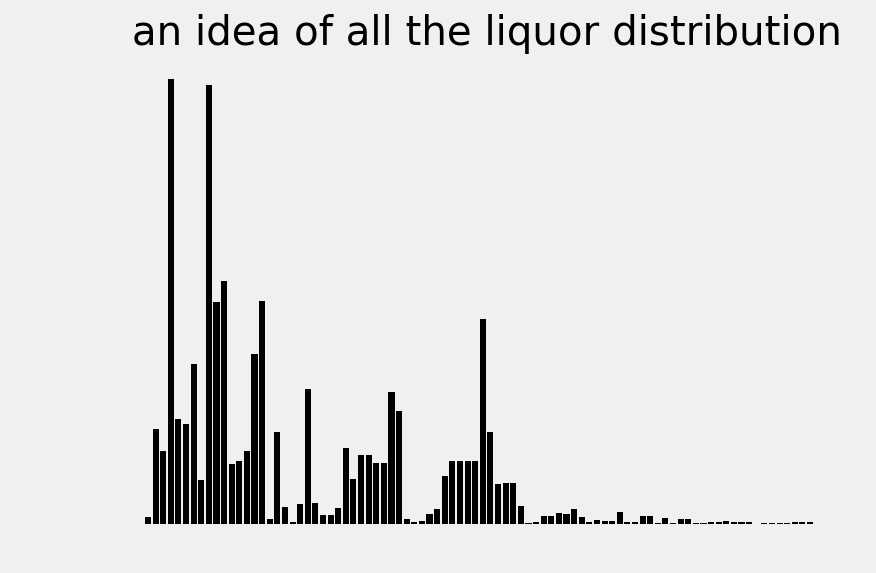

In [348]:
new_list = []
words = ([w for w in data['Category Name']])
for x in words:
    try:
        x = x.split()
        for x in x:
            new_list.append(x)
    except:
            pass
count = Counter(new_list)
plt.bar(count.keys(), count.values(),color='black')
plt.title('an idea of all the liquor distribution')
plt.axis('off')

In [349]:
category = [i for i,j in count.items() if j >5000]

In [350]:
ignore =['BLENDED', 'STRAIGHT', 'BOURBON', 'WHISKIES',
         'AMERICAN','COCKTAILS','80',
         'PROOF', 'DRY','GRAPE', 'CANADIAN',
         'IMPORTED', 'SCHNAPPS', 'FLAVORED','TENNESSEE', 'LIQUEUR',
         'MISC.', 'CORDIALS', '&', 'LIQUEURS', 'PUERTO',
         'RICO', 'VIRGIN', 'ISLANDS', 'SPICED', 'CREAM'
         , '-', 'MISC']
broader_cat = [cat for cat in category if cat not in ignore]
broader_cat

['BRANDIES', 'VODKA', 'GINS', 'TEQUILA', 'WHISKEY', 'SCOTCH', 'RUM']

In [351]:
def label_race(row):
    for i in broader_cat: 
        if (i) in row['Category Name']:
            return i
    return 'Others'

In [352]:
data['brand'] = data.apply(lambda x: label_race(x), axis = 1)

In [353]:
data['brand'].unique()

array(['BRANDIES', 'Others', 'VODKA', 'GINS', 'TEQUILA', 'WHISKEY',
       'SCOTCH', 'RUM'], dtype=object)

In [354]:
'''
    in this line of code, I transfer them to dummy variable and prepare for the 
    multivariate regressio analysis
'''

data['categorical']=data['brand'].astype('category').cat.codes

In [355]:
dummy_var_df = pd.get_dummies(data, columns=['brand'])

---

are there any noticable relationships between liquor brand and sales? profit? 

In [356]:
# we have some control variables here; 
# I controlled some of the variables and use the dummies for regression analysis
x = dummy_var_df[['Bottles Sold',
                  'Volume Sold (Liters)',
                  'Bottle Volume (ml)', 
                  
                  'brand_BRANDIES',
                  'brand_GINS',
                  'brand_Others', 
                 'brand_RUM',
                  'brand_SCOTCH',
                  'brand_TEQUILA', 
                  'brand_VODKA', 
                  'brand_WHISKEY']]

y = dummy_var_df['Sale (Dollars)']

In [357]:
model = sm.OLS(y, x).fit()

In [358]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 7.949e+04
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:33:32   Log-Likelihood:            -1.7989e+06
No. Observations:              269258   AIC:                         3.598e+06
Df Residuals:                  269247   BIC:                         3.598e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bottles Sold             5.7960      0.035    165.371      0.000       5.727       5.865
Volume Sold (Liters)     6.9572      0.029    236.115      0.000       6.899       7.015
Bottle Volume (ml)       0.0049      0.001      5.998      0.000       0.003       0.007
brand_BRANDIES           1.5759      1.697      0.929      0.353      -1.751       4.902
brand_GINS             -10.3642      2.110     -4.912      0.000     -14.500      -6.229
brand_Others            13.9979      0.977     14.328      0.000      12.083      15.913
brand_RUM                6.5673      1.347      4.875      0.000       3.927       9.208
brand_SCOTCH            58.3080      2.232     26.122      0.000      53.933      62.683
brand_TEQUILA           44.6051      1.881     23.718      0.000      40.919      48.291
brand_VODKA            -24.6968      1.096    -22.539      0.000     -26.844     -22.549
brand_WHISKEY           19.7638      2.080      9.500      0.000      15.686      23.842
==============================================================================
Omnibus:                   559815.439   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      34144222180.131
Skew:                          16.650   Prob(JB):                         0.00
Kurtosis:                    1747.218   Cond. No.                     7.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [359]:
'''
    it appears, GINS and VODKA are negatively related to sales
    lets see the correlation matrix
    
'''

'\n    it appears, GINS and VODKA are negatively related to sales\n    lets see the correlation matrix\n    \n'

In [360]:
dummy_var_df[[      'Sale (Dollars)', 
              
                    'brand_BRANDIES',
                  'brand_GINS',
                  'brand_Others', 
                 'brand_RUM',
                  'brand_SCOTCH',
                  'brand_TEQUILA', 
                  'brand_VODKA', 
                  'brand_WHISKEY']].corr()

Sale (Dollars)  brand_BRANDIES  brand_GINS  brand_Others  \
Sale (Dollars)        1.000000       -0.020239   -0.018469      0.007746   
brand_BRANDIES       -0.020239        1.000000   -0.047373     -0.202703   
brand_GINS           -0.018469       -0.047373    1.000000     -0.163022   
brand_Others          0.007746       -0.202703   -0.163022      1.000000   
brand_RUM             0.010556       -0.090106   -0.072467     -0.310080   
brand_SCOTCH          0.000246       -0.043920   -0.035322     -0.151140   
brand_TEQUILA         0.015420       -0.052518   -0.042237     -0.180729   
brand_VODKA          -0.014100       -0.143420   -0.115345     -0.493548   
brand_WHISKEY         0.019318       -0.049767   -0.040025     -0.171263   

                brand_RUM  brand_SCOTCH  brand_TEQUILA  brand_VODKA  \
Sale (Dollars)   0.010556      0.000246       0.015420    -0.014100   
brand_BRANDIES  -0.090106     -0.043920      -0.052518    -0.143420   
brand_GINS      -0.072467     -0.035322      -0.042237    -0.115345   
brand_Others    -0.310080     -0.151140      -0.180729    -0.493548   
brand_RUM        1.000000     -0.067185      -0.080338    -0.219394   
brand_SCOTCH    -0.067185      1.000000      -0.039159    -0.106938   
brand_TEQUILA   -0.080338     -0.039159       1.000000    -0.127873   
brand_VODKA     -0.219394     -0.106938      -0.127873     1.000000   
brand_WHISKEY   -0.076131     -0.037108      -0.044372    -0.121175   

                brand_WHISKEY  
Sale (Dollars)       0.019318  
brand_BRANDIES      -0.049767  
brand_GINS          -0.040025  
brand_Others        -0.171263  
brand_RUM           -0.076131  
brand_SCOTCH        -0.037108  
brand_TEQUILA       -0.044372  
brand_VODKA         -0.121175  
brand_WHISKEY        1.000000

In [361]:
# lets viulize it, but run with cautious, it consumes lots of processing power

# pd.plotting.scatter_matrix(dummy_var_df, figsize=(6, 6))
# plt.show()

--- 
the tax board wants to design a tax or taxes that affect larger stores more than smaller 'mon and pop stores'



thought process:
- How do we define large stores and the `mon & pop` stores; also, How do we tax on hard alchol more than other liquor types. 
- By study the total volume sold quantiles, it is easy for us to find out some small stores, we createa new col `if_sml_stores_` which contains value 0 and 1 to classify different types of stores;
- quoting the hard liquors from Google websites: https://www.leaf.tv/articles/types-of-hard-liquor/; they are Gin, Vodka, Rum, Whiskey, Tequila, Brandy;

- taxes can be applied accordingly based on the criteria: `if has high profit` & `if sell hard achol` & `if sell large volume`

- also when comes to the level of taxation, all the stores should be considered in 

In [362]:
base_data['Profit'] = base_data['Sale (Dollars)']-base_data['State Bottle Cost']*base_data['Bottles Sold']

In [363]:
store_profit = base_data[['Store Number', 'Profit']].groupby(['Store Number'], as_index = False).sum()

In [364]:
base_data['brand'] = base_data.apply(lambda x: label_race(x), axis = 1)

In [365]:
# this data show all store 2015 --> 2016 sales 
store_profit.head()

Store Number    Profit
0          2106  58916.88
1          2113   3802.53
2          2130  46517.61
3          2152   2891.61
4          2178  10034.46

In [366]:
x = store_profit.loc[store_profit['Profit'] <= 20000]
x = x['Profit']

In [367]:
fig = px.box( y = x, points='all', template = 'plotly_dark')
fig.show()

some stores are quite making a fortune comaprable with other firms

In [368]:
base_data['Total_Vol_Sold'] = base_data['Bottle Volume (ml)'] * base_data['Bottles Sold']/1000

In [369]:
data_sold_plot = base_data.loc[base_data['Total_Vol_Sold'] <= 100]
data_sold_plot = data_sold_plot['Total_Vol_Sold']

In [370]:
fig = px.box( y = data_sold_plot, template='plotly_dark')
# fig.show()

In [371]:
fig.show()

#### we assign some index which used to measure if the alchol is hard alchol

##### simply, if the category is 'Others' $\rightarrow$ then I consider it is `0` not hard_alchol, else, it is `1`; 

In [372]:
def hard_alchol(row):
    if row['brand'] == 'Others':
        return 0
    else:
        return 1
    

In [373]:
base_data['hard_level'] = base_data.apply(lambda row: hard_alchol(row), axis =1 )

In [374]:
# base_data.head()


In [375]:
stores = base_data.groupby(['Store Number'])['Profit', 
                                             'Total_Vol_Sold',
                                             'hard_level'].apply(sum).reset_index()

In [376]:
low = 0.15
high = 0.85

quant_df = stores[['Profit', 
                  'Total_Vol_Sold', 
                  'hard_level']].quantile([low, high])
quant_df

Profit  Total_Vol_Sold  hard_level
0.15    948.0400        202.1600        15.0
0.85  12536.0395       2742.4375       214.9

#### ignore for now
the following chunks of code, they originally used to find the outlier based on `iqr`;


---

In [377]:
# unfiltered_data = data[['Store Number',
#                              'Bottles Sold', 
#                              'Sale (Dollars)' ,
#                               'Volume Sold (Liters)', 
#                              'categorical', 
#                              'border_category', 
#                              'Profit', 
#                              'Total_Vol_Sold']].groupby('Store Number').agg(sum).reset_index()
# unfiltered_data.head().T

In [378]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.15)
#     q3 = df_in[col_name].quantile(0.85)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [379]:
# remove_list = ['Bottles Sold', 
#                  'Sale (Dollars)',
#                  'Volume Sold (Liters)', 
#                  'Profit', 
#                 'Total_Vol_Sold']

# for i in remove_list: 
#     filtered_data = remove_outlier(data, i) 


In [380]:

# filtered_data = filtered_data[['Store Number', 
#                               'County', 
#                              'Bottle Volume (ml)', 
#                              'Bottles Sold', 
#                              'Sale (Dollars)' ,
#                               'Volume Sold (Liters)', 
#                              'categorical', 
#                              'border_category', 
#                              'Profit', 
#                              'Total_Vol_Sold']]

---

Classification process
let me desgin a index to calssify the mon and pop's stores with the big ones

In [381]:
base_data = base_data.groupby('Store Number')[['Profit',
                                               'Sale (Dollars)', 
                                                'Bottles Sold', 
                                               'Volume Sold (Liters)',
                                               'Total_Vol_Sold', 
                                               'hard_level']].apply(sum).reset_index()

In [382]:
quant_df = base_data[['Bottles Sold',
                 'Volume Sold (Liters)', 
                 'Profit', 
                'Total_Vol_Sold',
                     'hard_level']].quantile([low, high])
quant_df

Bottles Sold  Volume Sold (Liters)      Profit  Total_Vol_Sold  \
0.15        273.55              202.1490    948.0400        202.1600   
0.85       3255.50             2742.5145  12536.0395       2742.4375   

      hard_level  
0.15        15.0  
0.85       214.9

In [383]:
base_data['if_sml_stores_profit'] = base_data['Profit'].apply(lambda x: 1 if
                                                              x <=  948.0400
                                                             else 0  if
                                                              x >= 12536.0395
                                                          else 0.5 )

In [384]:
base_data['if_sml_stores_vol'] = base_data['Total_Vol_Sold'].apply(lambda x : 1 if  
                                                                   x <= 202.1600
                                                                  else 0 if 
                                                                   x >  2742.4375
                                                                   else 0.5 )

In [385]:
base_data['if_sml_stores_hard_lv'] = base_data['Total_Vol_Sold'].apply(lambda x : 1 if  
                                                                       x <= 15
                                                                  else 0 if 
                                                                       x >= 214.9
                                                                   else 0.5 )

In [386]:
classifier = base_data[ ['if_sml_stores_profit', 
                        'if_sml_stores_vol', 
                        'if_sml_stores_hard_lv'] 
                      ]

In [387]:
classifier['sum'] = classifier['if_sml_stores_hard_lv'] + classifier['if_sml_stores_vol']+ classifier['if_sml_stores_vol']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [388]:
classifier['sum'].unique()

array([0. , 1. , 1.5, 2.5, 3. ])

### interpretation; 
- if the index is `0` then, the stores is considered as large stores; sell hard alchol, make lots of profit and Sales

- if the index is `2` then, the store fulfill either of the condition; 

- if the index is `3` then the store has large probility to be `mon & pop` Stores

---

so here, we can classify groups 

## Bonus Questions

In [389]:
# avoid seasonal change
data['Quarter'] = pd.PeriodIndex(data['Date'], freq='Q-DEC').strftime('Q%q')

In [390]:
# data['year'] = data['Date'].dt.year
# assgin the first quarter in yr 2016 as the fifth quarter which is easier for compare;
data.loc[data['year'] == 2016, 'Quarter'] = 'Q5'
data[['year', 'Quarter']].head()

year Quarter
0  2015      Q4
1  2016      Q5
2  2016      Q5
3  2016      Q5
4  2015      Q3

In [391]:
stores_profit_quarter = data.groupby(['Store Number',
                                     'Quarter'] )[['Sale (Dollars)']].apply(sum).reset_index()


In [392]:
stores_profit_quarter.head(10)

Store Number Quarter  Sale (Dollars)
0          2106      Q1        39287.29
1          2106      Q2        31173.46
2          2106      Q3        38324.77
3          2106      Q4        37253.18
4          2106      Q5        30478.75
5          2113      Q1         2833.25
6          2113      Q2         1994.30
7          2113      Q3         2113.56
8          2113      Q4         2369.11
9          2113      Q5         2065.90

But with the observation that we had, it is not interesting to see the quarter Sales change
what I did is to apply `curve fitting` using the 4th degree of polynomial function to study the daily sales change and plot it`

the webstites that I am referenced to is this [one](https://machinelearningmastery.com/time-series-seasonality-with-python/)

In [393]:
from numpy import polyfit

In [394]:
stores_sales_d = data.groupby( ['Date'])[['Sale (Dollars)']].apply(sum).reset_index()

In [395]:
stores_sales_d.head()

Date  Sale (Dollars)
0 2015-01-05       165133.30
1 2015-01-06       117254.79
2 2015-01-07       146504.34
3 2015-01-08        99617.52
4 2015-01-12       120179.01

In [396]:
max(stores_sales_d['Date'])

Timestamp('2016-03-31 00:00:00')

In [397]:
len(stores_sales_d)

274

In [398]:
# prepare the date for curve fitting

y = stores_sales_d['Sale (Dollars)']
x = [i%500 for i in range(0, len(stores_sales_d))]
degree = 4
coef = polyfit(x,y,degree)


In [399]:
curve = list()
for i in range(len(x)):
	value = coef[-1]
	for d in range(degree):
		value += x[i]**(degree-d) * coef[d]
	curve.append(value)

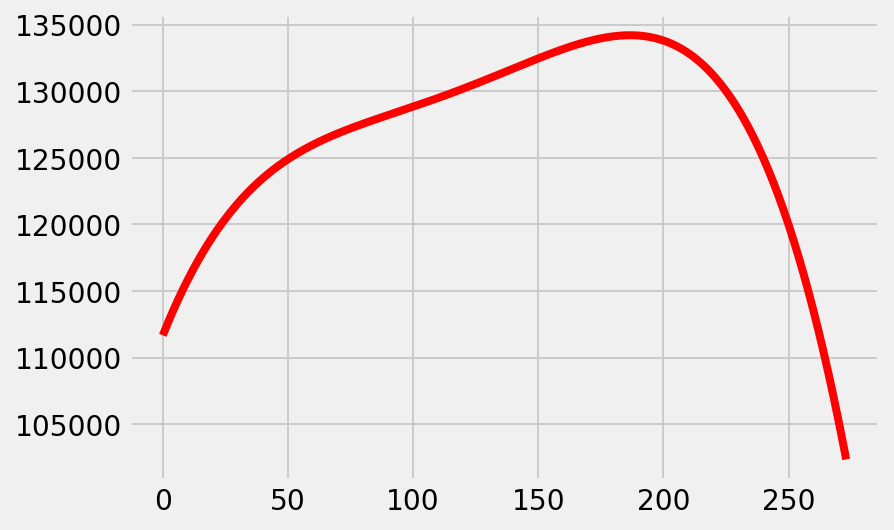

In [400]:
plt.plot(curve, color='red', linewidth=4)

visually, the sales for each day on record

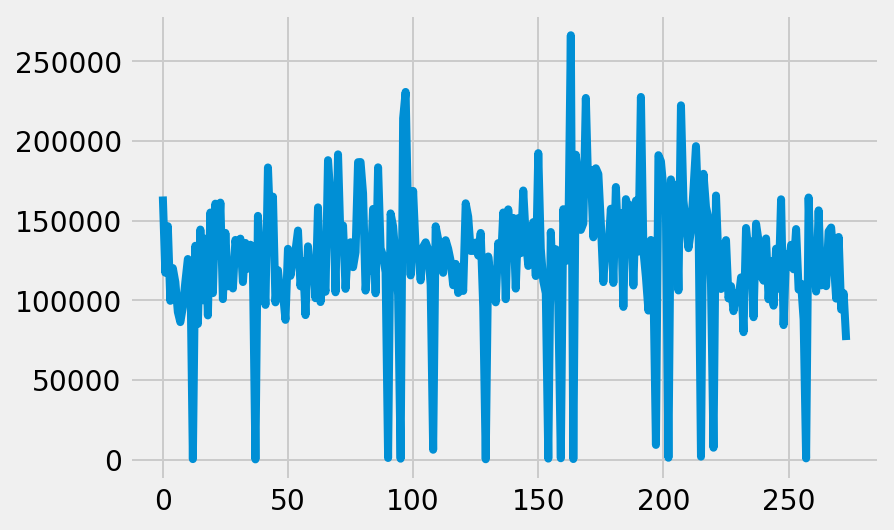

In [401]:
stores_profit_quarter['Profit'] = stores_sales_d['Sale (Dollars)']
plt.plot(stores_sales_d['Sale (Dollars)'])

plt.show()

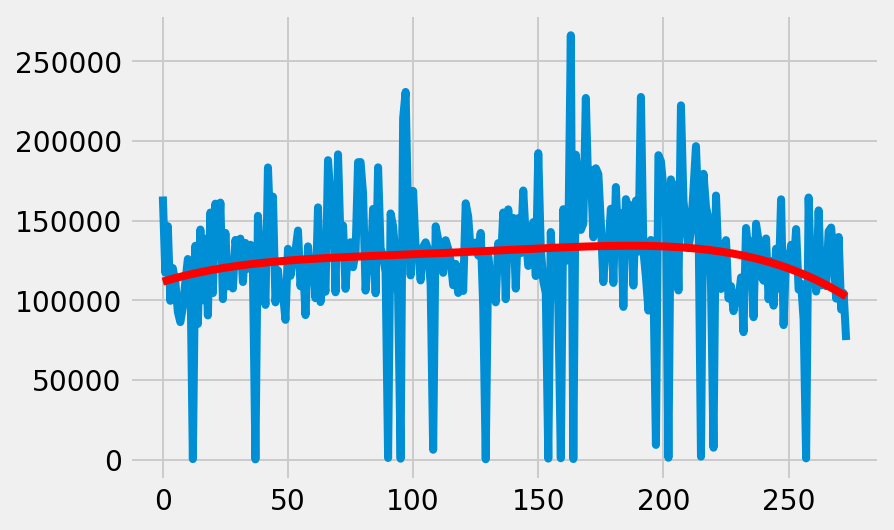

In [402]:
stores_profit_quarter['Profit'] = stores_sales_d['Sale (Dollars)']
plt.plot(stores_sales_d['Sale (Dollars)'])
plt.plot(curve, color='red', linewidth=4)
plt.show()

the metric that we are designing is `KPI` (`year to year growth rate`), thanks to group member Paola for providing this idea. 



In [403]:
county_quarter_profit = data.groupby(['Quarter', 'County', 'City'] )[['Profit']].apply(sum).reset_index()

In [404]:
stores_Q5= county_quarter_profit.loc[county_quarter_profit['Quarter'] == 'Q5']

In [405]:
stores_Q1 = county_quarter_profit.loc[county_quarter_profit['Quarter'] == 'Q1']

In [406]:

interseciton = pd.merge(stores_Q1, stores_Q5, how = 'left', 
                       left_on=['County', 'City'],
                       right_on = ['County', 'City'])

In [407]:
interseciton.head()

Quarter_x County        City  Profit_x Quarter_y  Profit_y
0        Q1  Adair       ADAIR    459.96        Q5    297.84
1        Q1  Adair  FONTANELLE    565.67        Q5    805.98
2        Q1  Adair  GREENFIELD   1247.89        Q5   1067.02
3        Q1  Adair      STUART   1137.86        Q5   1771.17
4        Q1  Adams     CORNING    751.31        Q5    733.32

In [408]:
# then just use use one col to subtract another to find the yr to yr growth rate
interseciton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 6 columns):
Quarter_x    378 non-null object
County       378 non-null object
City         378 non-null object
Profit_x     378 non-null float64
Quarter_y    366 non-null object
Profit_y     366 non-null float64
dtypes: float64(2), object(4)
memory usage: 20.7+ KB


In [409]:
interseciton['yr2yrGrowth'] = (interseciton['Profit_y'] - interseciton['Profit_x'])/interseciton['Profit_y']

In [410]:
interseciton[ ['County','City','yr2yrGrowth'] ].sort_values(by = 'yr2yrGrowth', ascending=False).reset_index().head(10)

index      County           City  yr2yrGrowth
0    110   Dickinson        OKOBOJI     0.988132
1      5   Allamakee  HARPERS FERRY     0.933994
2     58       Cedar       STANWOOD     0.907552
3    186      Jasper          SULLY     0.897669
4    135      Greene       SCRANTON     0.873183
5     64    Cherokee        AURELIA     0.844072
6      7   Allamakee      POSTVILLE     0.817782
7    139      Grundy      WELLSBURG     0.816420
8    103  Des Moines       DANVILLE     0.804417
9     85     Clinton    GRAND MOUND     0.801040

In [411]:
# first lets see the brand of alchol that makes the most of profits
brand_profit = data.groupby(['brand'])['Profit'].apply(sum).reset_index()

In [412]:
brand_profit

brand      Profit
0  BRANDIES   484104.35
1      GINS   305484.26
2    Others  4905517.09
3       RUM  1521125.65
4    SCOTCH   368673.06
5   TEQUILA   627561.82
6     VODKA  2787619.60
7   WHISKEY   597738.49

In [413]:
data.loc[data['City'] == 'OKOBOJI'].head()

Date  Store Number     City  Zip Code  County Number     County  \
2756  2016-02-09          5021  OKOBOJI     51355             30  Dickinson   
4443  2015-07-07          5021  OKOBOJI     51355             30  Dickinson   
12115 2015-12-01          5021  OKOBOJI     51355             30  Dickinson   
22578 2015-08-25          5021  OKOBOJI     51355             30  Dickinson   
25413 2015-11-10          5021  OKOBOJI     51355             30  Dickinson   

       Category        Category Name  Vendor Number  Item Number   ...     \
2756    1031080       VODKA 80 PROOF            434        36306   ...      
4443    1022100              TEQUILA            395        89196   ...      
12115   1012200      SCOTCH WHISKIES             35         4866   ...      
22578   1012100    CANADIAN WHISKIES            115        11776   ...      
25413   1081300  PEPPERMINT SCHNAPPS            434        81204   ...      

      Volume Sold (Gallons)  year  month  border_category    brand  \
2756                   4.76  2016      2            VODKA    VODKA   
4443                   2.38  2015      7          TEQUILA  TEQUILA   
12115                  1.19  2015     12         WHISKIES   SCOTCH   
22578                  2.38  2015      8         WHISKIES   Others   
25413                  0.40  2015     11         SCHNAPPS   Others   

       categorical  Profit  Total_Vol_Sold  hard_level  Quarter  
2756             6   40.08            18.0           1       Q5  
4443             5   63.00             9.0           1       Q3  
12115            4   41.22             4.5           1       Q4  
22578            2   31.44             9.0           0       Q3  
25413            2    4.56             1.5           0       Q4  

[5 rows x 27 columns]

it looks like that we should sell `BRANDIES`

but lets see that if in 	`Dickinson	OKOBOJI` we should sell BRANDIES?

In [414]:
Dickinson_OKOBOJI_brands = data[ (data['County'] == 'Dickinson') & (data['City'] == 'OKOBOJI') ]

In [415]:
Dickinson_OKOBOJI_brands.groupby(['Store Number', 'brand'])['Profit'].apply(sum).reset_index()

Store Number    brand  Profit
0          5021   Others  534.78
1          5021      RUM  119.53
2          5021   SCOTCH   41.22
3          5021  TEQUILA   63.00
4          5021    VODKA  412.03
5          5021  WHISKEY   78.30

 :) :) 
 
 okay, they do not drink Brandies there; sadd
 
 and acutally, if we look close enough, store 5021 is a `MONOPOLY` in Dickinson OKOBOJI

# The End
thanks for grading our hw !!!

---